จากชุดข้อมูล student_score.csv และ TestDuration.csv ให้นิสิตแสดงการเขียนโค้ดเพื่อทำ data wrangling และทำการ plot ให้ได้ดังรูปต่อไปนี้

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

####  
### ตอนที่ 1: ชุดข้อมูล student_score.csv

In [2]:
df_score = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/student_score.csv")
df_score.head()

,ID,stat,math,comp,sec
0,ID-1,45.97,26.52,52.62,1
1,ID-2,40.05,17.13,42.89,1
2,ID-3,38.24,42.57,36.44,1
3,ID-4,40.64,16.69,43.22,1
4,ID-5,51.72,43.76,45.19,1


\
**1.1. จงแสดงวิธีการให้ได้มาซึ่งกราฟดังรูป**  
  
ข้อแนะนำ  
- ควรสร้างตัวแปรเพื่อเก็บ plot object ไว้ก่อน เช่น  
  g=sns.jointplot(...)  
  จากนั้นจึงจะสามารถใช้ g.ax_joint.axhline(...) และ g.ax_joint.axvline(...) ได้  ข้อนี้หากใช้ plt.axhline(...) และ plt.axvline(...) จะไม่ปรากฏเส้นบนกราฟ

![](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/ex4_plot1.svg)

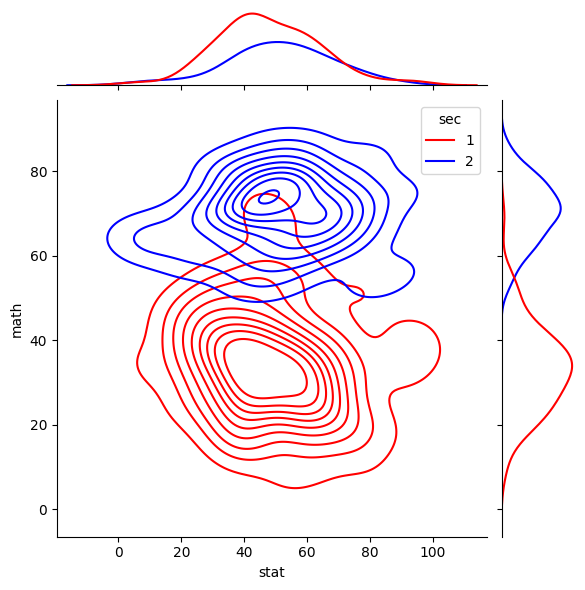

In [7]:
g = sns.jointplot(data=df_score,
              x='stat',
              y='math',
              hue='sec',
              kind='kde',
              palette=['r', 'b']) # contour plot

\
**1.2. จงแสดงวิธีการให้ได้มาซึ่งกราฟดังรูป**  
พร้อมกับพิมพ์อธิบายว่าวิชาใดคะแนนของนิสิตต่างหมู่ (sec) มีความแตกต่างกันอย่างชัดเจน หากข้อสอบที่ใช้กับแต่ละหมู่เป็นข้อสอบคนละชุดให้นิสิตคาดการณ์ถึงสาเหตุที่ส่งผลให้นิสิตต่างหมู่มีคะแนนต่างกันอย่างชัดเจน  
  
ข้อแนะนำ  
- อาจต้องมีการแปลงข้อมูลให้อยู่ในรูปแบบที่สามารถใช้คำสั่ง plot ได้ง่ายขึ้น เช่น จากคอลัมน์ 'stat','math','comp' ทำอย่างไรให้มารวมอยู่ในคอลัมน์เดียวโดยตั้งชื่อว่า Subject โดยมีอีกคอลัมน์ชื่อ Score สำหรับเก็บคะแนนวิชานั้นๆ (นิสิตลองศึกษา https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

![](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/ex4_plot2.svg)

In [ ]:
# Your code

####  
### ตอนที่ 2: ชุดข้อมูล TestDuration.csv

\
**2.1. จงแสดงวิธีการให้ได้มาซึ่งกราฟดังรูป**  
  
ข้อแนะนำ  
- Duration_mins หมายถึงช่วงเวลาตั้งแต่ Start ถึง End ในหน่วยนาที ดังนั้นต้องหาวิธีในการจัดการข้อมูลเวลา
- อาจพิจารณาใช้ total_seconds() ประกอบการคำนวณ https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html

![](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/ex4_plot3.svg)

In [ ]:
df_test = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/TestDuration.csv")
df_test.head()

,Student ID,Group,Gender,Start,End
0,1,A,F,13:00,15:05
1,2,A,M,14:10,16:00
2,3,C,M,12:50,14:23
3,4,B,F,9:15,10:45
4,5,A,M,13:05,16:25


In [ ]:
# Your code